In [3]:
pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 544.7 kB/s eta 0:00:06
     -- ------------------------------------- 0.2/3.0 MB 1.0 MB/s eta 0:00:03
     ---- ----------------------------------- 0.3/3.0 MB 1.6 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 2.1 MB/s eta 0:00:02
     ------- -------------------------------- 0.6/3.0 MB 2.3 MB/s eta 0:00:02
     ----------- ---------------------------- 0.8/3.0 MB 2.6 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 3.0 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 3.0 MB/s eta 0:00:01
     ----------------------- ---------------- 1.7/3.0 MB 3.7 MB/s eta 0:00:01
     -------------------------- ------------- 2.0/3.0 MB 3.8 MB/s eta 0:00:01
     -

In [47]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 定義計算移動平均線的函數
def calculate_moving_average(data, column_name, window):
    return data[column_name].rolling(window=window).mean()

# 下載股票數據 (以台積電為例)
ticker = '2330.TW'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')


[*********************100%***********************]  1 of 1 completed


In [25]:
data

,Open,High,Low,Close,Adj Close,Volume,30MA,120MA
Date,,,,,,,,
2020-01-02,332.5,339.0,332.5,339.0,307.796692,31754120,NaN,NaN
2020-01-03,344.0,345.0,335.5,339.5,308.250641,41811268,NaN,NaN
2020-01-06,333.0,334.5,332.0,332.0,301.441010,45343057,NaN,NaN
2020-01-07,332.5,333.0,326.5,329.5,299.171112,50879181,NaN,NaN
2020-01-08,325.0,333.0,325.0,329.5,299.171112,37567748,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-25,582.0,585.0,580.0,581.0,576.073059,9548143,577.400000,556.950000
2023-12-26,583.0,586.0,582.0,586.0,581.030640,16094308,577.866667,556.983333
2023-12-27,587.0,592.0,586.0,592.0,586.979858,33401336,578.233333,557.208333


In [49]:
# 使用函數計算20日和60日移動平均線
data['30MA'] = calculate_moving_average(data, 'Close', 30)
data['90MA'] = calculate_moving_average(data, 'Close', 90)

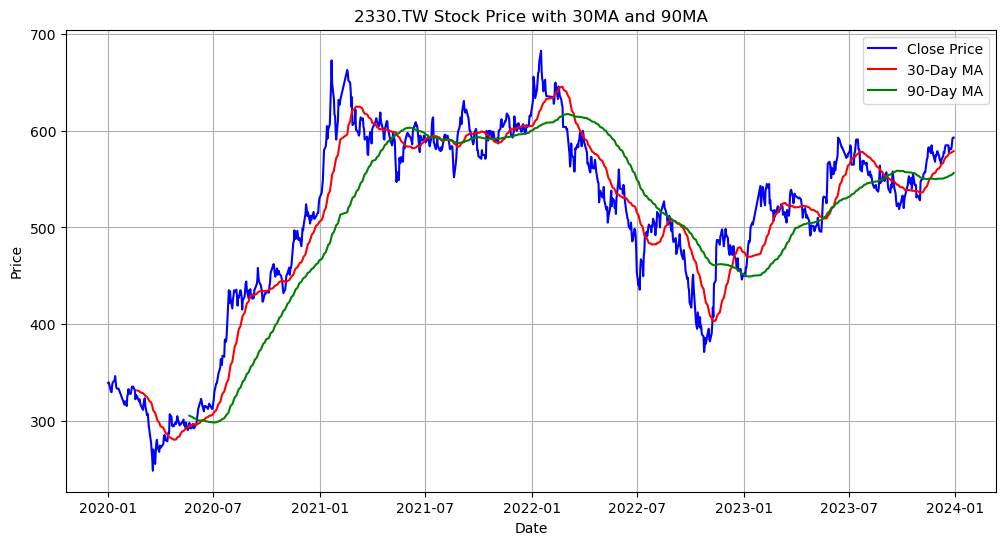

In [51]:
# 繪製收盤價與移動平均線
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['30MA'], label='30-Day MA', color='red')
plt.plot(data['90MA'], label='90-Day MA', color='green')

# 圖表標題與圖例
plt.title(f"{ticker} Stock Price with 30MA and 90MA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


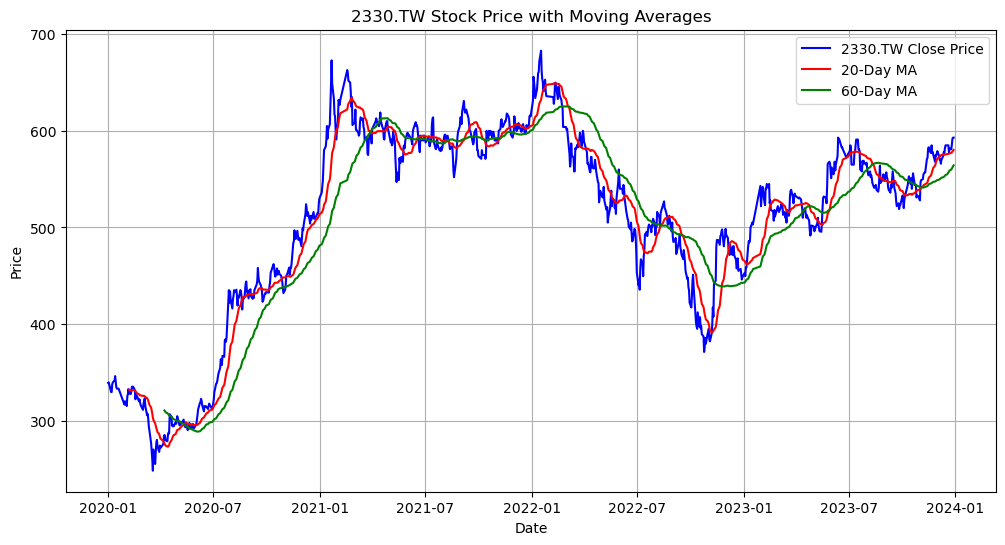

In [67]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 定義計算移動平均線的函數
def calculate_moving_average(data, column_name, window):
    """
    計算指定列的移動平均線

    :param data: pandas DataFrame, 包含股票數據
    :param column_name: str, 要計算均線的列名 (如 'Close')
    :param window: int, 均線的天數
    :return: pandas Series, 移動平均線數據
    """
    return data[column_name].rolling(window=window).mean()

# 定義一個函數來計算均線並繪圖
def plot_moving_average(data, ma_windows, ma_colors, title, ticker):
    """
    計算並繪製移動平均線圖，並允許指定每條均線的顏色

    :param data: pandas DataFrame, 包含股票數據
    :param ma_windows: list of int, 均線的天數 (如 [20, 60])
    :param ma_colors: list of str, 每條均線對應的顏色 (如 ['red', 'green'])
    :param title: str, 圖表的標題
    :param ticker: str, 股票代號，用於圖表標題和標籤
    """
    plt.figure(figsize=(12,6))
    
    # 繪製股票收盤價
    plt.plot(data['Close'], label=f'{ticker} Close Price', color='blue')
    
    # 確保顏色數量與均線數量一致
    if len(ma_colors) < len(ma_windows):
        raise ValueError("顏色數量應與均線天數數量相同")
    
    # 計算和繪製每條移動平均線，並為其指定顏色
    for i, window in enumerate(ma_windows):
        ma_column = f'{window}MA'
        data[ma_column] = calculate_moving_average(data, 'Close', window)
        plt.plot(data[ma_column], label=f'{window}-Day MA', color=ma_colors[i])
    
    # 設定圖表標題與圖例
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# 下載股票數據 (以台積電為例)
ticker = '2330.TW'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# 使用函數計算和繪製20日和60日均線的圖表，並設置顏色
plot_moving_average(
    data, 
    ma_windows=[20, 60], 
    ma_colors=['red', 'green'],  # 設定均線顏色
    title=f'{ticker} Stock Price with Moving Averages', 
    ticker=ticker
)
